## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(RMSProp)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [5]:
X = np.linspace(0,20)
X = X.reshape((50,1))


In [6]:
X.shape

(50, 1)

In [7]:
a=-1
b=2
y=a*X+b
y

array([[  2.        ],
       [  1.59183673],
       [  1.18367347],
       [  0.7755102 ],
       [  0.36734694],
       [ -0.04081633],
       [ -0.44897959],
       [ -0.85714286],
       [ -1.26530612],
       [ -1.67346939],
       [ -2.08163265],
       [ -2.48979592],
       [ -2.89795918],
       [ -3.30612245],
       [ -3.71428571],
       [ -4.12244898],
       [ -4.53061224],
       [ -4.93877551],
       [ -5.34693878],
       [ -5.75510204],
       [ -6.16326531],
       [ -6.57142857],
       [ -6.97959184],
       [ -7.3877551 ],
       [ -7.79591837],
       [ -8.20408163],
       [ -8.6122449 ],
       [ -9.02040816],
       [ -9.42857143],
       [ -9.83673469],
       [-10.24489796],
       [-10.65306122],
       [-11.06122449],
       [-11.46938776],
       [-11.87755102],
       [-12.28571429],
       [-12.69387755],
       [-13.10204082],
       [-13.51020408],
       [-13.91836735],
       [-14.32653061],
       [-14.73469388],
       [-15.14285714],
       [-15

#### Plot X vs. y

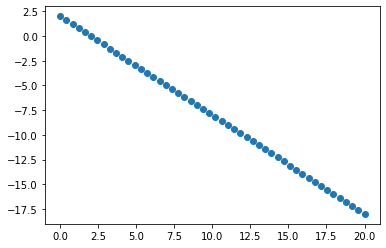

In [8]:
plt.scatter(X , y)

In [9]:
import math


## W(T+1)  = Wt - (a / sqr(v) +e) * dwt

In [38]:
def predict(theta0,theta1,X):
    h=theta0+theta1*X
    return h
def calc_error(h , y):
    m = len(y)
    error = (h - y)
    j = (error.T@error) /(2*m)
    return (error , j)

def calc_d_theta(h , y ,X , m):
    d_theta0 =np.sum(h - y) /m
    d_theta1 = np.sum((h-y)*X) / m
    g_vec =np.array([[d_theta0 ] , [d_theta1]])
    return(d_theta0 , d_theta1, g_vec)


def updatae_theta_Adagrad(theta0 ,v_t_0 , theta1,v_t_1,d_theta0 , d_theta1 ,a ,e):
    theta_0_new = theta0 - a /(math.sqrt(v_t_0)+e )*d_theta0
    theta_1_new = theta1 - a /(math.sqrt(v_t_1)+e )*d_theta1
    return (theta_0_new,theta_1_new )


def updatae_theta_Adam(theta0 ,v_t_0 , theta1,v_t_1  ,a ,e ,m_hat0 , m_hat1 ):
    theta_0_new = theta0 - (a /(math.sqrt(v_t_0)+e ))*m_hat0
    theta_1_new = theta1 - (a /(math.sqrt(v_t_1)+e ))*m_hat1
    return (theta_0_new,theta_1_new )

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [24]:
def RMSProp(X,y , a , e, iterations  , b ):
    theta_0_new1 = 0 
    theta_1_new1=0
    m =len(X)
    costs_hestory=[]
    thetas0 =[]
    thetas1 =[]
    hs = []
    vt0s = [0]
    vt1s= [0]
    v_t_0 = 0 
    v_t_1 = 0
    
    for i in range(iterations):
        print(f' #################   In the iteration {i} #############################################################')
        h = predict(theta_0_new1 , theta_1_new1 , X)
        error1 , j1 = calc_error(h  , y )
        costs_hestory.append(j1[0][0])
        
        print('Error Vec  \n'+str(error1)+'\n')
        print('j = '+str(j1))
        print()
        d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=m , X=X ,y=y)
        v_t_0 =b* vt0s[i] +(1-b)*(d_theta01**2)
        v_t_1 =b* vt1s[i] +(1-b)*(d_theta11**2)
        vt0s.append(v_t_0)
        vt1s.append(v_t_1)
        grad_norm = np.linalg.norm(e_vec)
        print('d_theta0 : '+str(d_theta01))
        print('d_theta1 : '+str(d_theta11))
        print('the gradient vec is' +str(e_vec))
        print('the gradient vec norm is' +str(grad_norm))
        thetas0.append(theta_0_new1)
        thetas1.append(theta_1_new1)
        hs.append(h)
        if i !=0:
            if abs(costs_hestory[i] -costs_hestory[i-1]) <=0.001:
                break
        if grad_norm<0.001:
            break            
        theta_0_new1 , theta_1_new1 = updatae_theta_Adagrad(theta0=theta_0_new1 , theta1=theta_1_new1 , v_t_1=v_t_1 , v_t_0 = v_t_0
                                                        ,d_theta0=d_theta01 ,d_theta1=d_theta11,a=a,e=e )
        

        print('theta_0_new : '+str(theta_0_new1))
        print('theta_1_new : '+str(theta_1_new1))
    print('#################################################################################')
    print('theta0 optemal '+str(theta_0_new1))
    print('theta1 optemal '+str(theta_1_new1))
    return (theta_0_new1 , theta_1_new1 , costs_hestory , thetas0 , thetas1 , hs)
        
        
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = RMSProp(X,y ,0.05 ,1e-08, 500 , b = 0.9 )
h = predict(theta0 , theta1 ,X)


 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

d_theta0 : 8.0
d_theta1 : 114.69387755102042
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec

In [25]:
print(f'r2 score is {r2_score(y,h)}')

r2 score is 0.9993602095484933


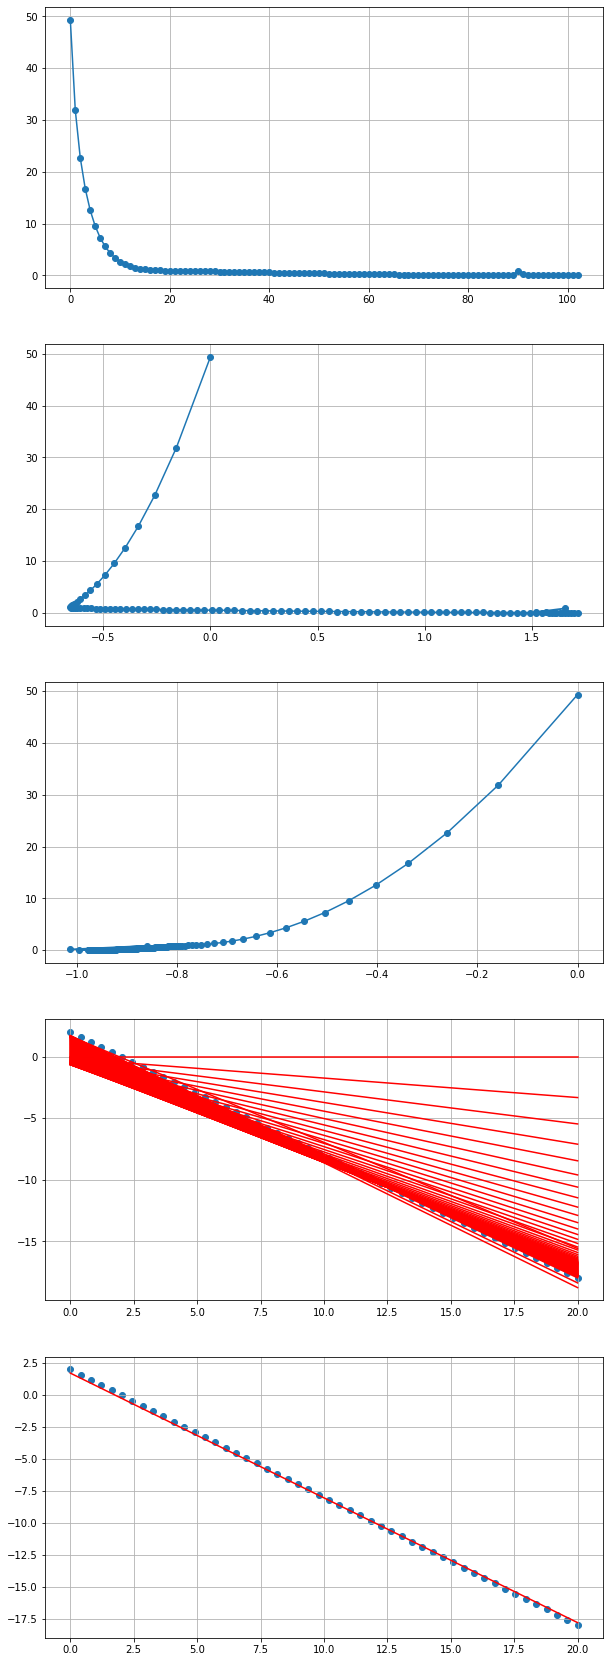

In [26]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [27]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = RMSProp(X,y ,0.005 ,1e-08, 5000 , b = 0.9 )

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

d_theta0 : 8.0
d_theta1 : 114.69387755102042
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec

In [28]:
print(f'r2 score is {r2_score(y,h)}')

r2 score is 0.9993602095484933


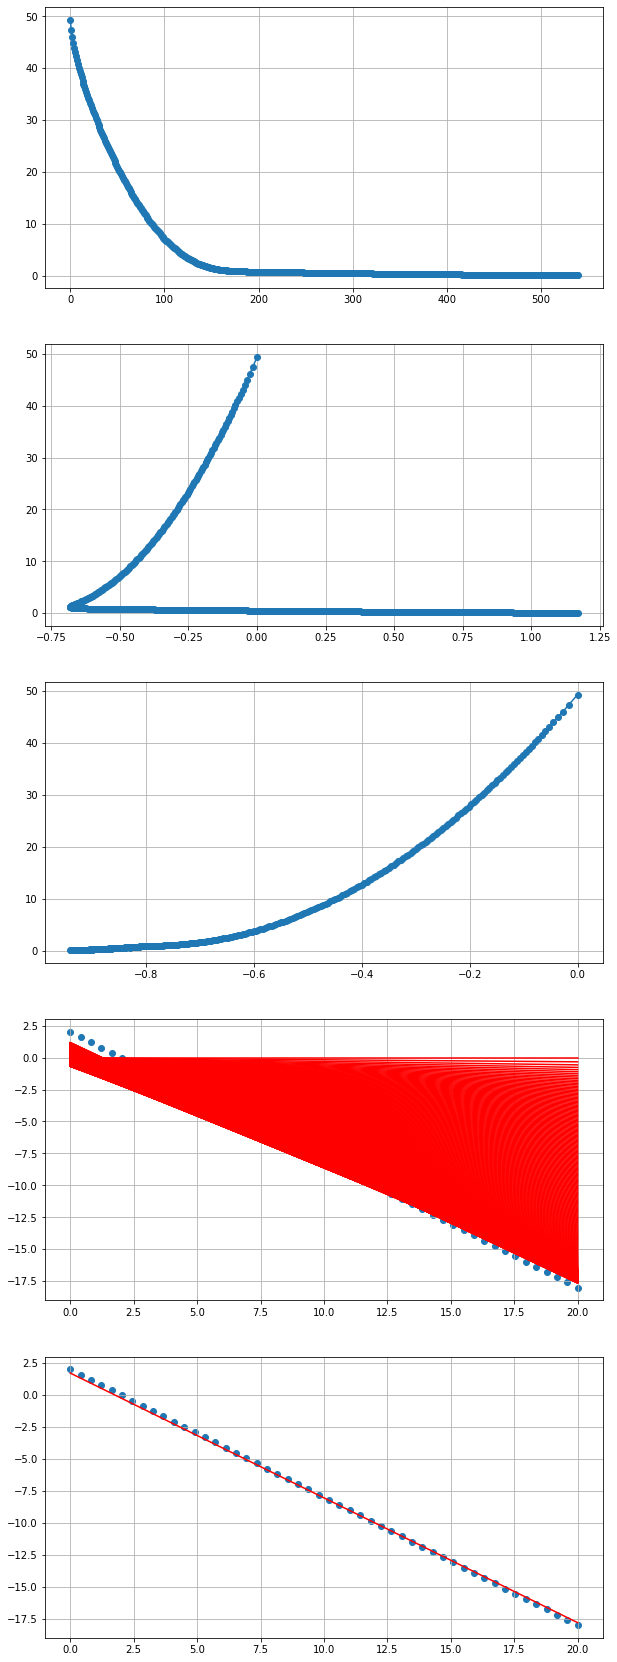

In [29]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [30]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = RMSProp(X,y ,0.0005 ,1e-08, 5000 , b = 0.9 )
h = predict(theta0 , theta1 ,X)

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

d_theta0 : 8.0
d_theta1 : 114.69387755102042
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec

In [31]:
print(f'r2 score is {r2_score(y,h)}')

r2 score is 0.9476184845511563


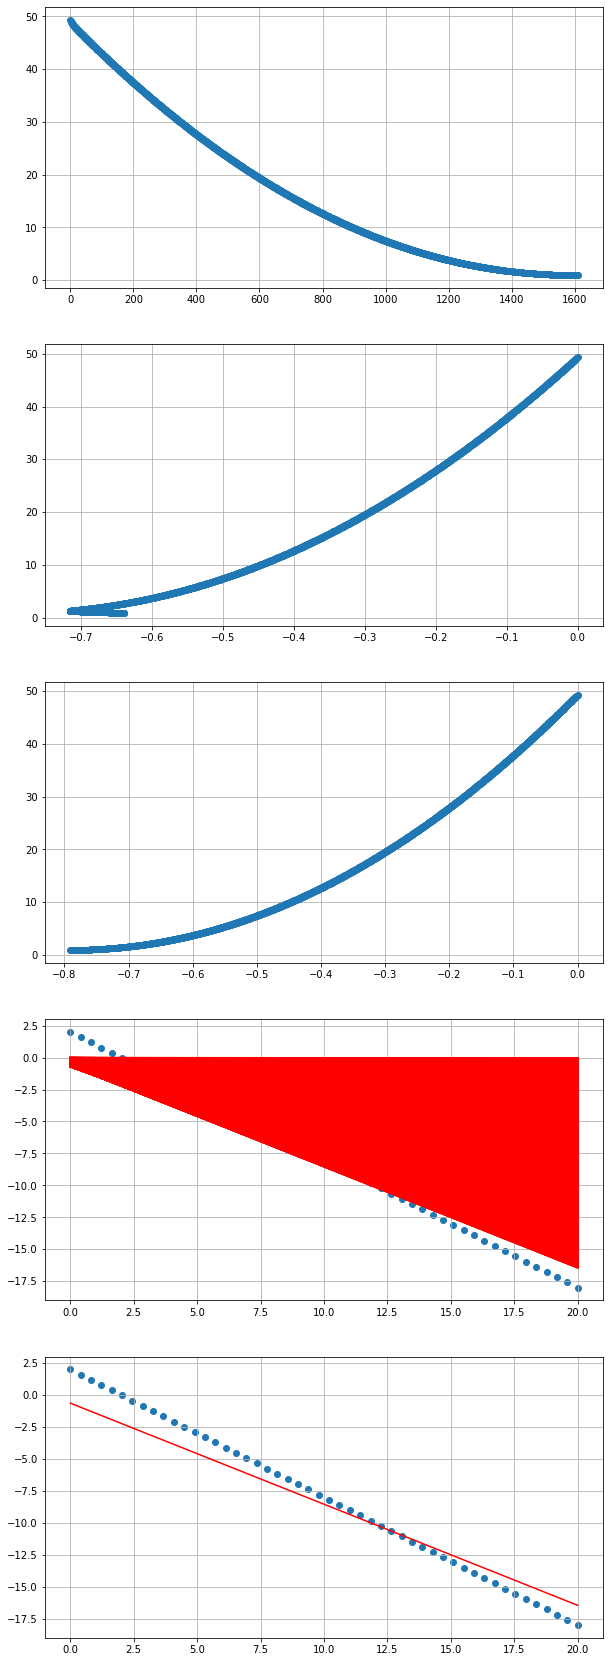

In [32]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)